In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [260]:
import os
print(os.getcwd())

/Users/vamshisamudrala/Projects/Fake_Bills


In [261]:
df = pd.read_csv('/Users/vamshisamudrala/Projects/Fake_Bills/fake_bills.csv',sep=";")

In [262]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [264]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [265]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [266]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

<Axes: >

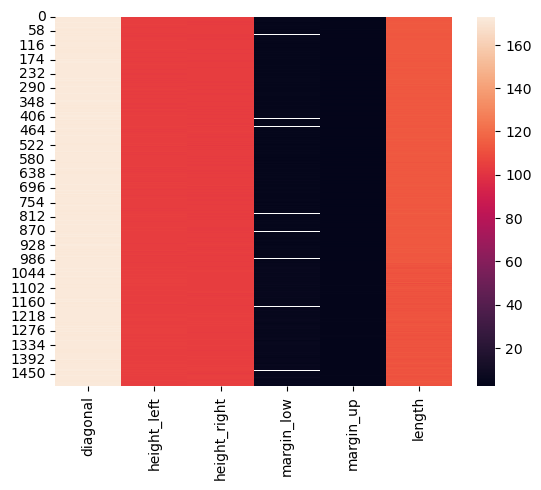

In [267]:
sns.heatmap(df.drop(columns = ['is_genuine'], axis = 1))

In [268]:
mean_margin_low = df['margin_low'].mean()

In [269]:
df['margin_low'].fillna(mean_margin_low, inplace=True)

<Axes: >

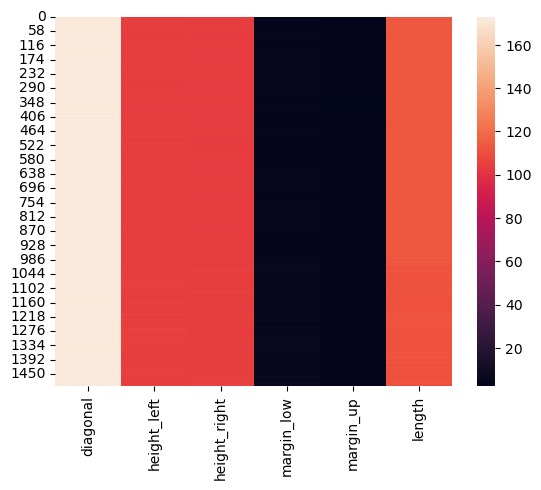

In [270]:
sns.heatmap(df.drop(columns = ['is_genuine'], axis = 1))

<Axes: xlabel='is_genuine', ylabel='count'>

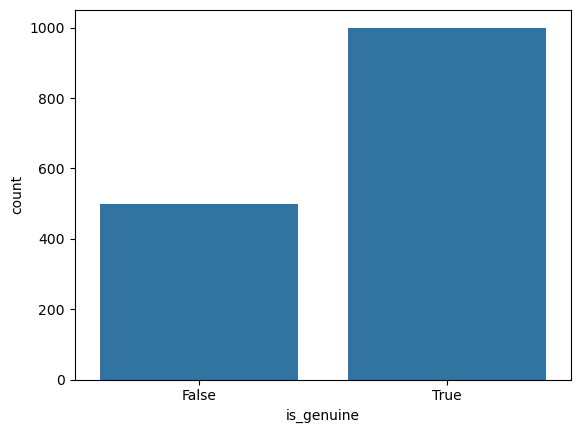

In [271]:
sns.countplot(data=df, x='is_genuine')

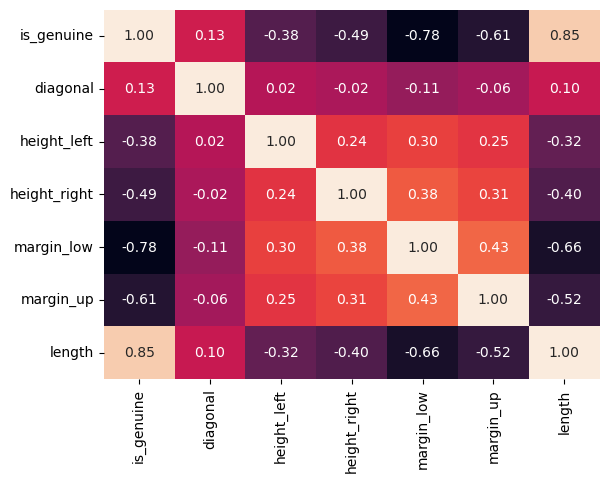

In [272]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None);

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X = df.drop(columns = 'is_genuine')
y = df['is_genuine']

In [275]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:
Knn = KNeighborsClassifier(n_neighbors=1)

In [278]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [279]:
y_pred = Knn.predict(X_test)

In [280]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [281]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[156   5]
 [  2 287]]
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       161
        True       0.98      0.99      0.99       289

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Accuracy: 0.9844444444444445


In [282]:
error_rate = []

for i in range(1,40):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    pred_i = y_pred = Knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

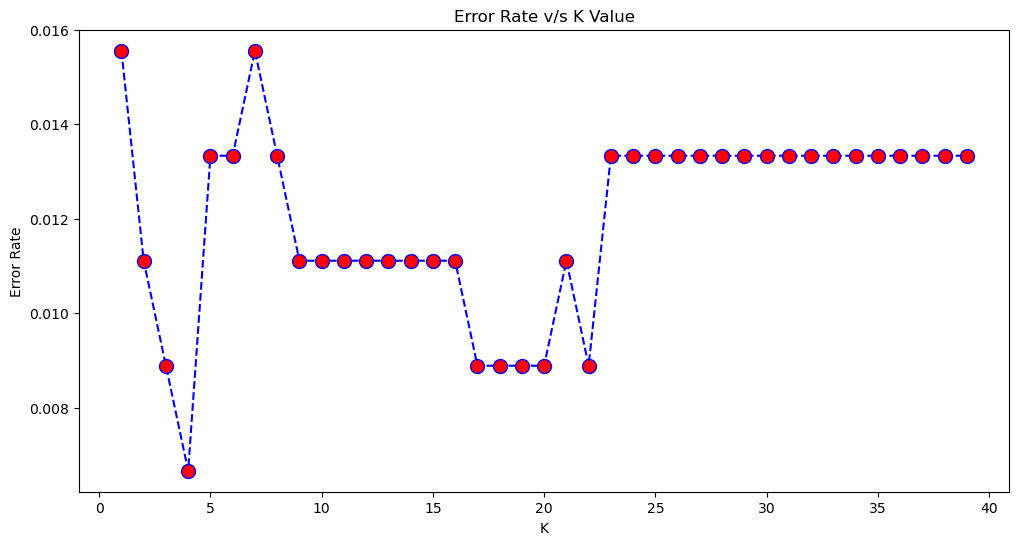

In [283]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize='10')
plt.title('Error Rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [284]:
Knn_4 = KNeighborsClassifier(n_neighbors=4)

In [285]:
Knn_4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [286]:
y_pred_4 = Knn_4.predict(X_test)

In [287]:
print(confusion_matrix(y_test, y_pred_4))
print(classification_report(y_test, y_pred_4))
print("Accuracy:",accuracy_score(y_test, y_pred_4))

[[159   2]
 [  1 288]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       161
        True       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

Accuracy: 0.9933333333333333
